In [75]:
import math
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

NodeLocation = Tuple[int, int]

class Graph:
    def __init__(self, 
        width: int,
        height: int,
    ):
        self.width = width
        self.height = height
        
        self.map = np.full((width, height), 0)
        
    
    def _in_graph(self, node: NodeLocation) -> bool:
        x, y = node
        if x >= 0 and x < self.width:
            if y >= 0 and y < self.height:
                return True
        return False
    
    def get_geography(self, location: NodeLocation):
        geo_colors = {
            1: 'desert',
            2: 'stream',
            0: 'blank',
            3: 'obstacle'
        }
        return geo_colors[self.map[location[0]-1, location[1]-1]]
    
    def add_geography(self, 
        deserts: List[NodeLocation]=None, 
        streams: List[NodeLocation]=None, 
        obstacles: List[NodeLocation]=None,
    ):
        if deserts:
            for de in deserts:
                self.map[de[0]-1, de[1]-1] = 1
        if streams:
            for st in streams:
                self.map[st[0]-1, st[1]-1] = 2
        if obstacles:
            for ob in obstacles:
                self.map[ob[0]-1, ob[1]-1] = 3
    
    def neighbors(self, node: NodeLocation) -> List[NodeLocation]:
        dirs = [
            [1, 0], [0, 1], [-1, 0], [0, -1],
            [1, 1], [1, -1], [-1, 1], [-1, -1]
        ]
        result = []
        for dir in dirs:
            neighbor = [node[0] + dir[0], node[1] + dir[1]]
            if self._in_graph(neighbor):
                result.append(neighbor)
        return result

    def cost(self, current: NodeLocation, next: NodeLocation):
        movement = [next[0] - current[0], next[1] - current[1]]
        if movement in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
            move_cost = 1
        elif movement in [[1, 1], [1, -1], [-1, 1], [-1, -1]]:
            move_cost = math.sqrt(2)
        
        if self.map[next[0], next[1]] == 1: # deserts
            geo_cost = 4
        elif self.map[next[0], next[1]] == 2: # streams
            geo_cost = 2
        elif self.map[next[0], next[1]] == 3: # obstacle
            geo_cost = int('inf')
        else:
            geo_cost = 0
        
        return move_cost + geo_cost
    
    def draw(self):
        geo_colors = {
            1: 'wheat',
            2: 'blue',
            0: 'white',
            3: 'gray'
        }
        fig, ax = plt.subplots()
        
        ax.set_aspect('equal', adjustable='box')
        
        for row in range(self.width):
            for col in range(self.height):
                color = geo_colors[self.map[row, col]] 
                ax.add_patch(patches.Rectangle((row, col), 1, 1, color=color)) 
        
        ax.set_xlim(0, self.width)
        ax.set_ylim(self.height, 0)
        ax.xaxis.set_ticks_position('top')
        
        for x in range(1, self.width):
            plt.axvline(x=x, linewidth=0.5, color='gray')
        for y in range(1, self.height):
            plt.axhline(y=y, linewidth=0.5, color='gray')

        interval = 5
        label_list = list(i+1 for i in range(interval-1, self.width, interval))
        xtick_list = [i-0.5 for i in label_list]
        ax.set_xticks(xtick_list)
        ax.set_xticklabels(label_list)
        label_list = list(i+1 for i in range(interval-1, self.height, interval))
        ytick_list = [i-0.5 for i in label_list]
        ax.set_yticks(ytick_list)
        ax.set_yticklabels(label_list)
        
        plt.show()

        

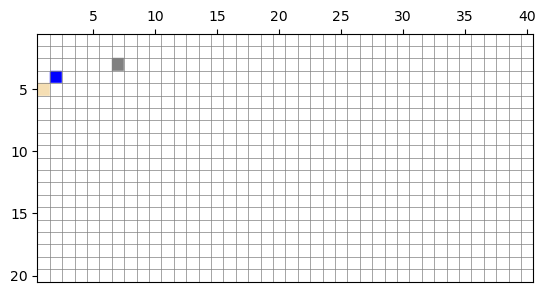

In [52]:

g = Graph(40, 20)
g.add_geography(deserts=[[1,5]], streams=[[2,4]], obstacles=[[7,3]])
g.draw()

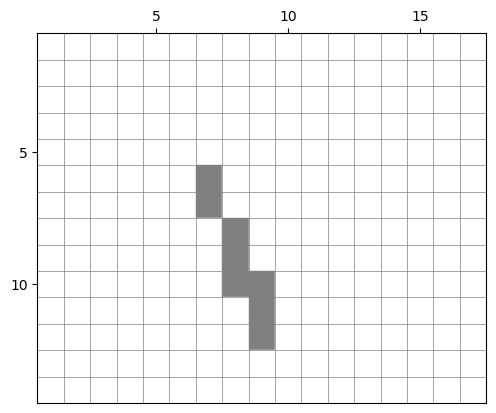

In [53]:
graph = Graph(17, 14)
obstacles = [
    [7, 6],
    [7, 7],
    [8, 8],
    [8, 9],
    [8, 10],
    [9, 10],
    [9, 11], 
    [9, 12]
]
graph.add_geography(obstacles=obstacles)
graph.draw()

In [91]:
graph = Graph(40, 20)
obstacles = [[13, i] for i in list(range(1, 9)) + list(range(13, 21))]
obstacles += [[i, 3] for i in list(range(1, 7))+list(range(8,12))]
obstacles += [[4, 1], [8, 1], [8, 2], [9, 4], [8, 6], [9, 6]]
obstacles += [[i, 7] for i in range(3, 9)] + [[3, 8], [6, 8], [8, 8]]
obstacles += [[6, i] for i in range(9, 13)]
obstacles += [[8, 10], [8, 11]]
obstacles += [[9, i] for i in range(11, 17)] + [[10, 14], [12, 14]]
obstacles += [[3, 11], [3, 12], [4, 12], [5, 12]]
obstacles += [[i, 16] for i in range(4, 9)] + [[8, 18], [8, 19], [8, 20]]
obstacles += [[4, 13], [4, 14], [4, 15], [4, 17], [4, 19], [4, 20]]
obstacles += [[25, 16], [25, 17], [26, 16], [26, 17]]
obstacles += [[29, 11], [32, 12], [32, 14], [37, 8], [37, 10]]
for i in range(20, 23):
    for j in range(11, 14):
        obstacles.append([i, j])
graph.add_geography(obstacles=obstacles)

In [92]:
deserts = [[i, 1] for i in range(25, 41)]
deserts += [[i, 2] for i in range(26, 41)]
deserts += [[i, 3] for i in range(27, 41)]
deserts += [[i, 4] for i in range(27, 38)]
deserts += [[i, 5] for i in range(27, 37)]
deserts += [[i, 6] for i in range(28, 34)]
deserts += [[i, 7] for i in range(28, 34)]
deserts += [[i, 8] for i in range(30, 34)]
graph.add_geography(deserts=deserts)

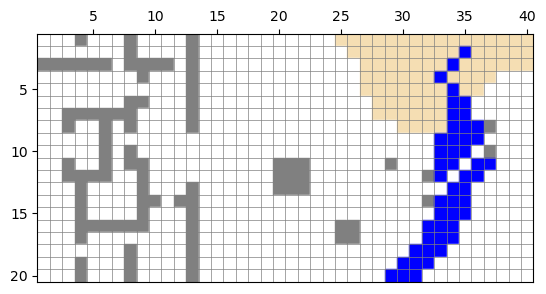

In [99]:
streams = [[35, 2], [34, 3], [33, 4], [34, 5]]
streams += [[34, i] for i in range(6, 11)]
streams += [[35, i] for i in range(6, 11)] + [[36, 9], [36, 8]]
streams += [[33, i] for i in range(9, 13)] + [[34, 11]]
streams += [[36, 11], [37, 11], [35, 12], [36, 12], [34, 13], [35, 13]]
streams += [[i, 14] for i in range(33, 36)]
streams += [[i, 15] for i in range(33, 36)]
streams += [[i, 16] for i in range(32, 35)]
streams += [[i, 17] for i in range(32, 35)]
streams += [[i, 18] for i in range(31, 34)]
streams += [[i, 19] for i in range(30, 33)]
streams += [[i, 20] for i in range(29, 32)]
graph.add_geography(streams=streams)
graph.draw()

In [82]:
graph.get_geography([35, 2])

'stream'

In [100]:
a = [1, 1]
b = [1, 1]
a == b

True

In [1]:
from Exp2_AStar import graph1, graph2, A_Star

start = [4,9]
target = [15, 10]
path = A_Star(graph1, start, target)
path

TypeError: unhashable type: 'list'

In [52]:
e = math.sqrt(2)
a = 4 * e + 1 + e + 4 + e + 1 + e + 2 * e
18.72792206135786 + 44.89949493661166

63.62741699796952